In [1]:
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels
from sklearn.model_selection import train_test_split
from src.models.tabnet import TabNetModel
from src.pipelines.utils import train_and_evaluate, plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
data = CICIDS2017()
data.load()
data = balanced_sample(data.data, "Label", 100)
# x, y = encode_labels(data, "Label")
x = data.drop(columns=["Label"]).values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

2025-03-06 03:06:40,632 - INFO - Loading dataset...


In [3]:
tabnet = TabNetModel()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


2025-03-06 03:06:54,532 - INFO - Pretraining for TabNet...


epoch 0  | loss: 612.67448| val_0_unsup_loss_numpy: 172.6768798828125|  0:00:00s
epoch 1  | loss: 116.23284| val_0_unsup_loss_numpy: 7.557929992675781|  0:00:00s
epoch 2  | loss: 37.96524| val_0_unsup_loss_numpy: 3.2266499996185303|  0:00:01s
epoch 3  | loss: 9.8834  | val_0_unsup_loss_numpy: 4.760009765625|  0:00:01s
epoch 4  | loss: 13.29916| val_0_unsup_loss_numpy: 2.7332499027252197|  0:00:01s
epoch 5  | loss: 5.3458  | val_0_unsup_loss_numpy: 1.46451997756958|  0:00:02s
epoch 6  | loss: 1.68778 | val_0_unsup_loss_numpy: 1.3613899946212769|  0:00:02s
epoch 7  | loss: 1.83433 | val_0_unsup_loss_numpy: 1.2639199495315552|  0:00:03s
epoch 8  | loss: 1.2947  | val_0_unsup_loss_numpy: 1.1336499452590942|  0:00:03s
epoch 9  | loss: 1.18694 | val_0_unsup_loss_numpy: 0.9816200137138367|  0:00:03s
epoch 10 | loss: 1.55072 | val_0_unsup_loss_numpy: 0.9045000076293945|  0:00:04s
epoch 11 | loss: 1.03536 | val_0_unsup_loss_numpy: 1.0471700429916382|  0:00:04s
epoch 12 | loss: 1.09648 | val_0_u

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-06 03:07:02,436 - INFO - Training TabNet model...


epoch 19 | loss: 1.03967 | val_0_unsup_loss_numpy: 1.0629500150680542|  0:00:07s
Stop training because you reached max_epochs = 20 with best_epoch = 10 and best_val_0_unsup_loss_numpy = 0.9045000076293945


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 2.85496 | val_accuracy: 0.33071 |  0:00:00s
epoch 1  | loss: 2.25082 | val_accuracy: 0.32283 |  0:00:00s
epoch 2  | loss: 1.89817 | val_accuracy: 0.3937  |  0:00:00s
epoch 3  | loss: 1.63528 | val_accuracy: 0.50787 |  0:00:01s
epoch 4  | loss: 1.46081 | val_accuracy: 0.5315  |  0:00:01s
epoch 5  | loss: 1.49523 | val_accuracy: 0.61811 |  0:00:01s
epoch 6  | loss: 1.31715 | val_accuracy: 0.59055 |  0:00:02s
epoch 7  | loss: 1.18727 | val_accuracy: 0.55118 |  0:00:02s
epoch 8  | loss: 1.16572 | val_accuracy: 0.67717 |  0:00:02s
epoch 9  | loss: 1.10149 | val_accuracy: 0.70079 |  0:00:02s
epoch 10 | loss: 1.14296 | val_accuracy: 0.54331 |  0:00:03s
epoch 11 | loss: 1.17287 | val_accuracy: 0.59843 |  0:00:03s
epoch 12 | loss: 1.09255 | val_accuracy: 0.59449 |  0:00:03s
epoch 13 | loss: 1.12728 | val_accuracy: 0.68504 |  0:00:04s
epoch 14 | loss: 1.01755 | val_accuracy: 0.56299 |  0:00:04s
epoch 15 | loss: 1.06896 | val_accuracy: 0.70472 |  0:00:04s
epoch 16 | loss: 1.01287

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-06 03:07:11,619 - INFO - Train Accuracy: 0.7880
2025-03-06 03:07:11,620 - INFO - Validation Accuracy: 0.7795
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

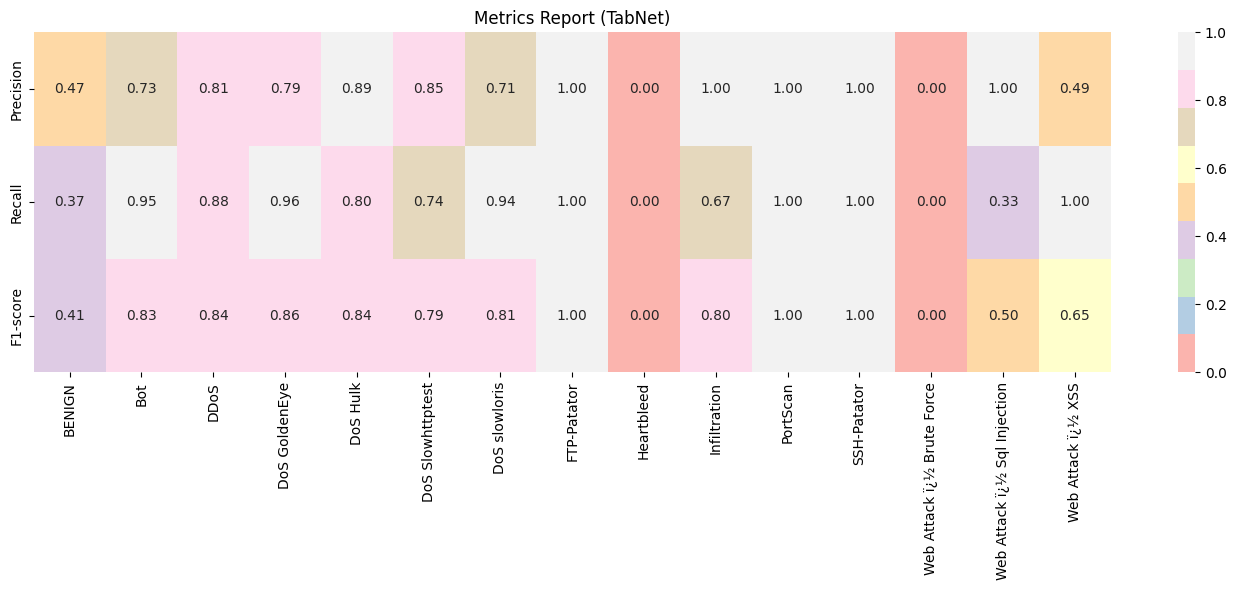

In [4]:
tabnet_results = train_and_evaluate(
    tabnet,
    "TabNet",
    X_train,
    y_train,
    X_test,
    y_test,
)

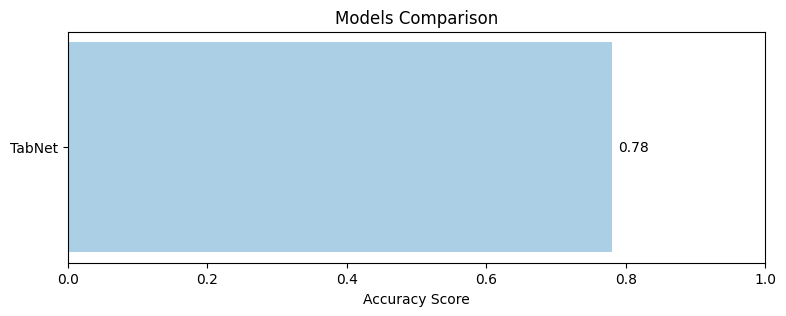

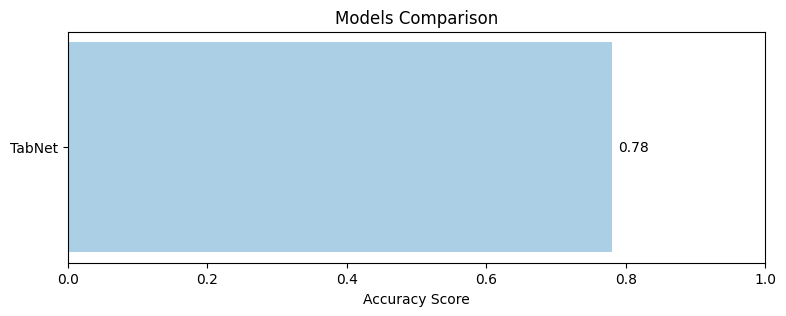

In [5]:
accuracies = [tabnet_results["accuracy"]]
plot_accuracies(accuracies, ["TabNet"])